<a href="https://colab.research.google.com/github/jerrychen1849/stats-project-2/blob/main/Math_408_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATH 408 Project 2


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import scipy.integrate as integrate #need this for 3c - Jadon
from scipy.stats import f, t, norm, tstd
from statsmodels.formula.api import ols
from IPython.display import Markdown as md
from datetime import date
from google.colab import files

date = date.today()
names = "Jadon Gaertner, Bryan Koh, Jerry Chen, Luy Kim, Brian Zhao"
title = names+'\n'+str(date)
md(f"{names}\n{date}")

Jadon Gaertner, Bryan Koh, Jerry Chen, Luy Kim, Brian Zhao
2022-12-11

## 1.
Let $X\sim N(0,3)$. Generate $100$ independent random variables with this distribution, and estimate the following expected value: $E\left(X^2 + \cos(X)\right)$. Calculate a $95\%$ Confidence interval for this expected value. Draw the
probability histogram for your sample means. 

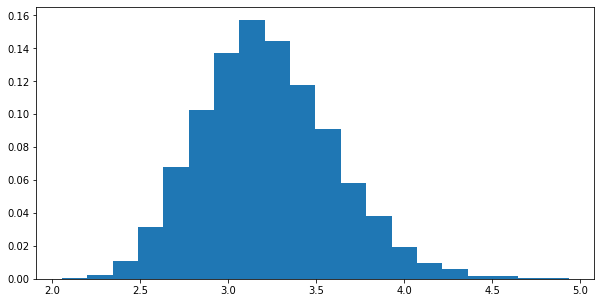


  $E\left(X^2 + \cos(X)\right) = \frac{1}{100}\sum_{i=1}^{100}\left(x_i^2+\cos(x_i)\right)$ \
  The calculated expected value is $2.6342$. \
  A $95\%$ confidence interval is $2.6342\pm0.44923$.


In [ ]:
x = norm.rvs(0, math.sqrt(3), size=100)  # 100 random variables
mean = np.mean(x**2+np.cos(x))  # Mean of random variables
interval = norm.ppf(1-0.025)*tstd(x**2+np.cos(x))/math.sqrt(len(x))  # z_{0.025} * s / sqrt{n}
sample_means = []
for _ in range(10000):  # 10000 samples
  x = norm.rvs(0, math.sqrt(3), size=100)
  sample_means.append(np.mean(x**2+np.cos(x)))
weights = np.ones_like(sample_means)/float(len(sample_means))  # Weights of bars for probability histogram
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=20, weights=weights)
plt.show()

md(f"""
  $E\\left(X^2 + \cos(X)\\right) = \\frac{{1}}{{100}}\sum_{{i=1}}^{{100}}\\left(x_i^2+\cos(x_i)\\right)$ \\
  The calculated expected value is ${mean:.5}$. \\
  A $95\%$ confidence interval is ${mean:.5}\pm{interval:.5}$.
""")

## 2.
Let $Y$ be a random variable defined by: $Y=S_0e^{\left(\sigma X+\left(r-\frac{\sigma^2}{2}\right)2\right)}$ where $r=0.04$, $\sigma=0.25$, $S_0=90$ and
$X\sim N(0,2)$. Generate $100$ independent random variables and $X$ with this distribution, and estimate the following $E(Y)$. Calculate a $95\%$ confidence interval for this expected value. Draw the probability histogram for your sample means.


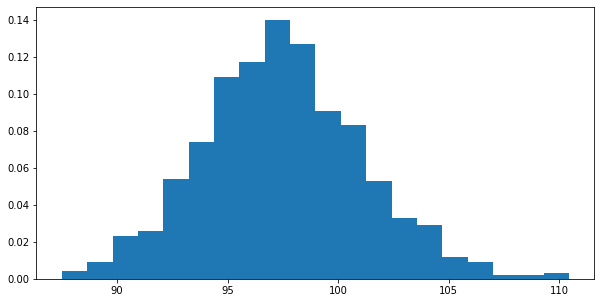


  $E\left(S_0e^{\left(\sigma X +\left(r-\frac{\sigma^2}{2}\right)2\right)}\right) = \frac{1}{100}\sum_{i=1}^{100}\left(S_0e^{\left(\sigma x_i +\left(r-\frac{\sigma^2}{2}\right)2\right)}\right)$ \
  The calculated expected value is $100.54$. \
  A $95\%$ confidence interval is $100.54\pm8.7355$.


In [ ]:
#initialize variables
r = 0.04
sigma = 0.25
S_0 = 90
#Create N(0,2)
x = norm.rvs(0, math.sqrt(2), size=100)
#Generate 100 independent random variables 
y = S_0*np.exp(sigma*x+(r-sigma**2/2)*2)

mean = np.mean(y)
#create the interval - 95% CI so z(0.025)*(standard_error)/sqrt(n)
interval = norm.ppf(1-0.025)*tstd(y)/math.sqrt(len(x)) 
#Create list of empty sample means 
sample_means = []

#Large sample of 10000
for i in range (1000):
    #Create N(0,2)
    x = norm.rvs(0, math.sqrt(2), size=100)
    #Generate 100 independent random variables 
    y = S_0*np.exp(sigma*x+(r-sigma**2/2)*2)
    #append each mean to empty list
    sample_means.append(np.mean(y))
#Calculate weights for probability histogram
weights = np.ones_like(sample_means)/float(len(sample_means))  
#plot histogram
plt.figure(figsize=(10,5))
plt.hist(sample_means, bins=20, weights=weights)
plt.show()

md(f"""
  $E\\left(S_0e^{{\\left(\sigma X +\\left(r-\\frac{{\sigma^2}}{{2}}\\right)2\\right)}}\\right) = \\frac{{1}}{{100}}\sum_{{i=1}}^{{100}}\\left(S_0e^{{\\left(\sigma x_i +\\left(r-\\frac{{\sigma^2}}{{2}}\\right)2\\right)}}\\right)$ \\
  The calculated expected value is ${mean:.5}$. \\
  A $95\%$ confidence interval is ${mean:.5}\pm{interval:.5}$.
""")



## 3.
Consider the following SDE: 
$$
dX_t = aX_tdt + bX_tdW_t, \quad X_0=100, \quad a=0.05, \quad b=0.20
$$
Here, $dW_t$ is an independent random variable of the form $\sqrt{\delta t}N(0,1)$.

### (a)
Simulate this stochastic process using the discretization schemes of Euler-Maruyama.

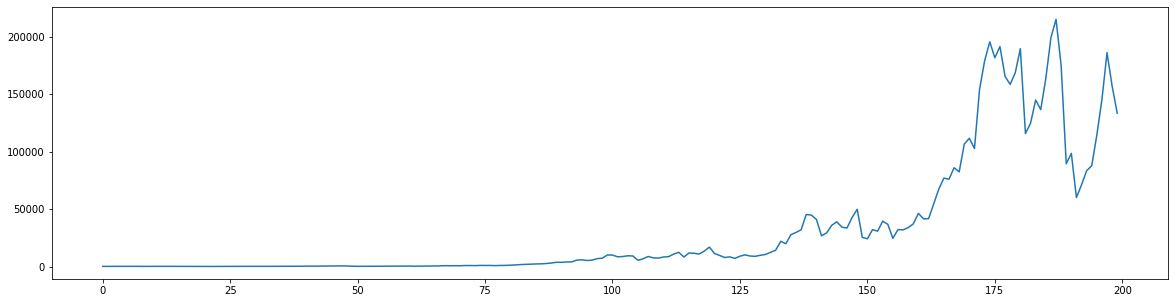

In [ ]:
plt.figure(figsize=(20,5))
dt = 1 #length of time step
T = 200 #total time
n = int(T/dt) #total time steps
X0 = 100
a = 0.05
b = 0.2
x_values = np.linspace(0, T-1, n)

#plotting line
y_values = np.zeros(n)
y_values[0] = X0 #base case
for j in range(n-1):
    y_values[j+1] = y_values[j] + a*y_values[j]*dt + b*y_values[j]*np.sqrt(dt)*np.random.normal(0, 1) #Euler-Maruyama formula
plt.plot(y_values)
plt.show()

### (b)
Evaluate the following expected value and probability:
$$
E(X_3^{0.4}), \quad P(X_3>2)
$$

In [ ]:
#approximating E(X_3^0.4) by taking 5000 random samples. Only calculating first 4 steps to speed things up
new_T = 4
new_n = int(new_T/dt)
averages = []
numerical = []
for i in range(5000): #loop through 5000 samples
    y_values = np.zeros(new_n)
    y_values[0] = X0 #base case
    for j in range(new_n-1):
        y_values[j+1] = y_values[j] + a*y_values[j]*dt + b*y_values[j]*np.sqrt(dt)*np.random.normal(0, 1)
    averages.append((y_values[3])**0.4) #taking samples of X3^0.4
    numerical.append(y_values[3]) #taking samples of X3
final_average = sum(averages)/5000 #calculating E(X3^0.4) numerically for part b
numerical_average = sum(numerical)/5000 #calculating E(X3) numerically for part b

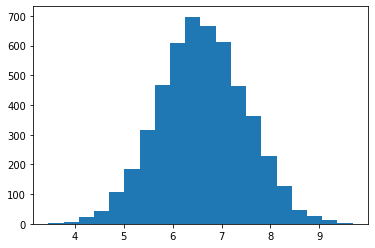


  The average of $5000$ samples of $X_3^{0.4}$ is $6.606$, therefore $E(X_3^{0.4})\approx 6.606$\
  The histogram showing the distribution of these 5000 samples is above. It looks like a normal distribution.\


In [ ]:
plt.hist(averages, bins=20)
plt.show()
md(f"""
  The average of $5000$ samples of $X_3^{{0.4}}$ is ${final_average:.4}$, therefore $E(X_3^{{0.4}})\\approx {final_average:.4}$\\
  The histogram showing the distribution of these 5000 samples is above. It looks like a normal distribution.\\
""")

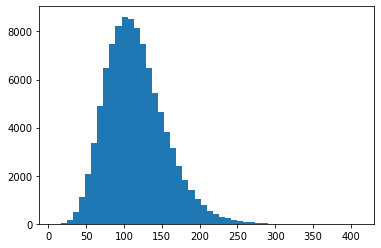


  For $P(X_3>2)$, I took $100,000$ samples of $X_3$ and measured how many were above $2$. Out of the $100000$ samples, there were $100000$ above $2$,\
  with the smallest at $8.294$.\
  While there is an arbitrarily small chance that $dW_t$ is sufficiently small to take the process from $X_0 = 100$ to $X_3 \le 2$, it is clearly best to\
  assume $P(X_3>2)\approx 1$ in practice.


In [ ]:
#whole separate code block to take 100,000 samples of X3
cnt = 0;
arr = []
for i in range(100000):# loop through 100000 samples of X3
    y_values = np.zeros(new_n)
    y_values[0] = X0 #base case
    for j in range(new_n-1):
        y_values[j+1] = y_values[j] + a*y_values[j]*dt + b*y_values[j]*np.sqrt(dt)*np.random.normal(0, 1)
    arr.append(y_values[3])
    if (y_values[3] > 2):
      cnt+=1;#increment number of items if the sample is greater than 2
plt.hist(arr, bins=50)
plt.show()
md(f"""
  For $P(X_3>2)$, I took $100,000$ samples of $X_3$ and measured how many were above $2$. Out of the $100000$ samples, there were ${cnt}$ above $2$,\\
  with the smallest at ${min(arr):.4}$.\\
  While there is an arbitrarily small chance that $dW_t$ is sufficiently small to take the process from $X_0 = 100$ to $X_3 \\le 2$, it is clearly best to\\
  assume $P(X_3>2)\\approx 1$ in practice.
""")

### (c)
Compare with the analytical solution.

Calculating $E(X_3)$ of
$$
dX(t) = \mu X(t)dt + \sigma\sqrt{X(t)}dW(t), \hspace{0.3cm} X(0) = X_0
$$
\
using the formula
$$
E(X(t)) = X_0e^{\mu t}
$$
\
Since $a = \mu = 0.05$, $b = \sigma = 0.2$, and $X_0 = 100$, we can plug in values to show that
$$
E(X(3)) = 100(e^{(0.05)(3)}) \approx 116.183
$$
This is the analytical solution.

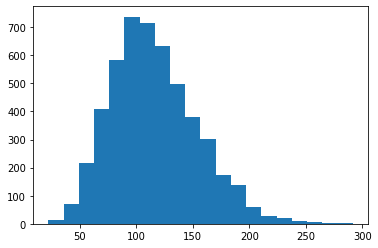


  The numerical solution for $E(X_3)$ is $115.95$, which is very close to the analytical solution.\
  The histogram showing the distribution of these 5000 samples is above. The average is clearly near the analytical solution.


In [ ]:
plt.hist(numerical, bins=20)
plt.show()
md(f"""
  The numerical solution for $E(X_3)$ is ${numerical_average:.5}$, which is very close to the analytical solution.\\
  The histogram showing the distribution of these 5000 samples is above. The average is clearly near the analytical solution.
""")

## 4.
It is believed that a mechanical property $Y$ of a metal is related to the amounts of two chemical components added $x_1$ and $x_2$. The data are given in table 1.

In [ ]:
data = [[85,1,-1],
        [110,1,1],
        [90,-1,1],
        [80,-1,-1],
        [90,0,0],
        [95,0,1],
        [80,1,0],
        [98,-2,1],
        [91,2,2],
        [95,1.5,1]]
data = pd.DataFrame(data, columns=['y','x1','x2'])
data

,y,x1,x2
0,85,1.0,-1
1,110,1.0,1
2,90,-1.0,1
3,80,-1.0,-1
4,90,0.0,0
5,95,0.0,1
6,80,1.0,0
7,98,-2.0,1
8,91,2.0,2
9,95,1.5,1


### (a) 
Fit the following second order model to this data.
$$
Y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1^2+\beta_4x_2^2+\epsilon
$$

In [ ]:
formula = "y ~ x1 + x2 + I(x1**2) + I(x2**2)"  # R-style regression formula
model = ols(formula, data=data)
results = model.fit()  # Fit the data using the formula and given data
Beta = np.array(results.params).reshape(-1,1)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.018
Date:                Sat, 03 Dec 2022   Prob (F-statistic):              0.478
Time:                        23:45:14   Log-Likelihood:                -32.596
No. Observations:                  10   AIC:                             75.19
Df Residuals:                       5   BIC:                             76.71
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.7970      4.420     20.541      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### (b)
Test $H_0:\beta_3=\beta_4=0$. Approximate the attained significance level and indicate the proper conclusion if we choose $\alpha=0.05$

In [ ]:
n = len(data)  # Number of data points
k = 4  # Parameters in full model (5)
g = 2  # Parameters in reduced model (3)
Y = np.array(data['y']).reshape(-1,1)
X_C = np.hstack((np.ones((n,1)), data[['x1','x2']], data[['x1','x2']]**2))  # X matrix of complete model
X_R = X_C[:,:3]  # X matrix of reduced model
Beta_C = np.linalg.inv(X_C.T @ X_C) @ X_C.T @ Y
assert (Beta_C-Beta < 0.0001).all()  # Check previous result of Beta_C using matrix form
SSE_C = np.squeeze(Y.T @ Y - Beta_C.T @ X_C.T @ Y)
Beta_R = np.linalg.inv(X_R.T @ X_R) @ X_R.T @ Y  # Parameters of reduced model
SSE_R = np.squeeze(Y.T @ Y - Beta_R.T @ X_R.T @ Y)
F = ((SSE_R-SSE_C)/(k-g)) / (SSE_C/(n-k-1))
level = 1-f.cdf(F, dfn=k-g, dfd=n-k-1)  # Significance level

md(f"""
  Reduced model: $Y=\\beta_0+\\beta_1x_1+\\beta_2x_2+\\epsilon$ \\
  Complete model: $Y=\\beta_0+\\beta_1x_1+\\beta_2x_2+\\beta_3x_1^2+\\beta_4x_2^2+\\epsilon$ \\
  $\\text{{SSE}}_C={SSE_C:.5}$ \\
  $\\text{{SSE}}_R={SSE_R:.5}$ \\
  With $\\text{{dfn}}={k-g}$ and $\\text{{dfd}}={n-k-1}$ \\
  $F={F:.5}$, $\\text{{significance level}} = {level:.3}$ \\
  $F_{{0.05}}={f.ppf(1-0.05, dfn=k-g, dfd=n-k-1):.5}$ \\
  Therefore if we choose $\\alpha=0.05$, we fail to reject $H_0$.
""")


  Reduced model: $Y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$ \
  Complete model: $Y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_1^2+\beta_4x_2^2+\epsilon$ \
  $\text{SSE}_C=397.0$ \
  $\text{SSE}_R=445.11$ \
  With $\text{dfn}=2$ and $\text{dfd}=5$ \
  $F=0.30296$, $\text{significance level} = 0.751$ \
  $F_{0.05}=5.7861$ \
  Therefore if we choose $\alpha=0.05$, we fail to reject $H_0$.


### (c)
Find a $95\%$ confidence interval for the mean value of $Y$ if $𝑥_1=1$ and $𝑥_2=0$.

In [ ]:
A = np.array([1,1,0,1,0]).reshape(-1,1)
mean = np.squeeze(A.T @ Beta)  # Mean value of estimation
s = math.sqrt(SSE_C/(n-k-1))  # Estimation of standard deviation
interval = t.ppf(1-0.025, df=n-k-1)*s*math.sqrt(np.squeeze(A.T@np.linalg.inv(X_C.T@X_C)@A))  # Distance from mean to bounds for confidence interval of mean value

md(f"""
  A $95\%$ confidence interval for the mean value of $Y$ when $x_1=1$ and $x_2=2$ is ${mean:.4} \pm {interval:.4}$.
""")


  A $95\%$ confidence interval for the mean value of $Y$ when $x_1=1$ and $x_2=2$ is $90.53 \pm 14.42$.


### (d)
Find a $95\%$ prediction interval for $Y$ if $x_1=1$ and $x_2=0$.

In [ ]:
interval = t.ppf(1-0.025, df=n-k-1)*s*math.sqrt(1+np.squeeze(A.T@np.linalg.inv(X_C.T@X_C)@A))  # Distance from mean to bounds for confidence interval of prediction value

md(f"""
  A $95\%$ prediction interval of $Y$ when $x_1=1$ and $x_2=2$ is ${mean:.4} \pm {interval:.4}$.
""")


  A $95\%$ prediction interval of $Y$ when $x_1=1$ and $x_2=2$ is $90.53 \pm 27.07$.


## 5.
Get daily price data for the past year of the stocks Apple (AAPL) and Tesla (TSLA). (you can get this data from many websites that contain financial information (for example yahoo finance). Calculate the daily returns.




### (a)
Make histograms of the returns and superimpose fitted normal densities. Comment on the quality of the fit. Which stock is more volatile?

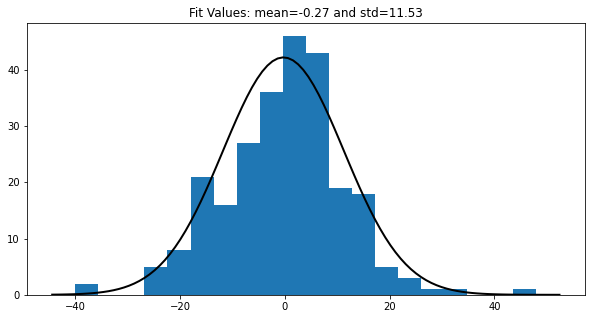

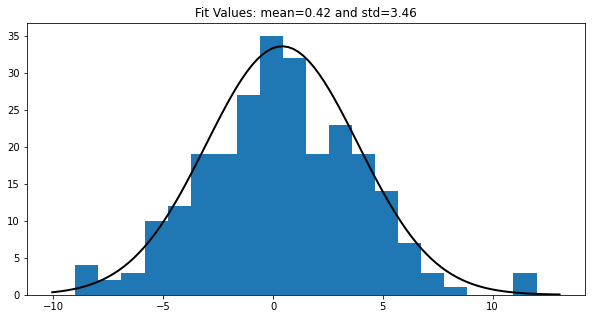

In [ ]:
def getData(fileName): #data extraction from the csv file of stock prices
    retList = []
    temp = []   #temporary list to hold values for each line in the csv file
    dailyReturn = 0.00
    firstIt = True
    secondIt = True
    fin = open(fileName, "r")
    for lines in fin: 
        if (firstIt):
            firstIt = False #first line contains categories, not the numbers we need
            continue
        lines = lines.strip()
        temp = lines.split(",") #(indices 0 & 4 respectively represent date and closing price)
        if (secondIt):
            secondIt = False
            retList.append(float(dailyReturn))
            dailyReturn = float(temp[4]) 
        else:
            dailyReturn = float(temp[4]) - float(dailyReturn) #subtract the price of previous day's stock price with current price
            retList.append(math.ceil(dailyReturn)) #cap the decimal points and add it to the list of return prices
            dailyReturn = float(temp[4])  #set variable to the current price, so that in the next iteration, we can use it to calculate how much returns we would get daily.
    return retList

def plot(priceList):  #graphing the data
    plt.figure(figsize=(10, 5))
    plt.hist(priceList, bins=20)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    plt.plot()
    mu, std = norm.fit(priceList)
    p = norm.pdf(x, mu, std)*len(priceList)*((xmax-xmin)/20)  # Scaled normal pdf curve
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: mean={:.2f} and std={:.2f}".format(mu, std)
    plt.title(title)
    plt.show()
    #sns.distplot(priceList, kde=True)

def main():
    priceListTSLA = getData("TSLA.csv")
    priceListAAPL = getData("AAPL.csv")
    plot(priceListTSLA)
    plot(priceListAAPL)

main()

We can see that the first histogram (TSLA) has a larger standard deviation, meaning that it is more volatile than the second histogram (AAPL).

### (b)
Do the returns follow a normal distribution? Use statistics to answer this question. Are the returns independent?

In [ ]:
def testIndependence(listOne, listTwo):   #testing for independence using Chi Square Distribution
    O = np.vstack((listOne,listTwo))
    total = np.sum(O)
    listOne = np.array(listOne)
    listTwo = np.array(listTwo)
    rowSums = [sum(listOne), sum(listTwo)]
    colSums = listOne + listTwo
    assert total == sum(rowSums) and total == sum(colSums)
    E = np.zeros((len(rowSums),len(colSums)))
    for i in range(len(rowSums)):           #finding the expected value for each cell of the table
        for j in range(len(colSums)):
            E[i,j] = rowSums[i] * colSums[j] / total
    chi_square = 0
    for i in range(E.shape[0]):
        for j in range(E.shape[1]):
            if E[i,j] != 0:
                chi_square += (O[i,j]-E[i,j])**2/E[i,j]   #Sum of (Observed Value - Expected Value)^2 / Expected Value
    print(chi_square)

Through Chi Square Test, with 251 degree of freedom and alpha = 0.05, we were able to conclude that the two returns from TSLA and AAPL stocks were indeed independent.

Chi Square for TSLA and AAPL = 43.24834375383892


Chi Square for alpha = 0.05 with 251 degree of freedom = 287.882